<a href="https://colab.research.google.com/github/AlishbaAzeem/Python/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### keras and Tensorflow >2.0

In [3]:
### Data Collection
import pandas_datareader as pdr

In [4]:
import requests
import pandas as pd
from google.colab import userdata

api_key = userdata.get('tiingo_api_key') # Replace 'tiingo_api_key' with the actual name of your secret
ticker = 'AAPL'
start_date = '2020-01-01' # Example start date
end_date = '2023-12-31' # Example end date

url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices?startDate={start_date}&endDate={end_date}&token={api_key}"

headers = {
    'Content-Type': 'application/json'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print("Data successfully fetched and loaded into DataFrame.")
    display(df.head())
else:
    print(f"Error fetching data: {response.status_code}")
    print(response.text)

Data successfully fetched and loaded into DataFrame.


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02T00:00:00.000Z,300.35,300.60,295.19,296.24,33911864,72.544828,72.605211,71.298511,71.552122,135647456,0.0,1.0
1,2020-01-03T00:00:00.000Z,297.43,300.58,296.50,297.15,36633878,71.839548,72.600381,71.614921,71.771918,146535512,0.0,1.0
2,2020-01-06T00:00:00.000Z,299.80,299.96,292.75,293.79,29644644,72.411984,72.450630,70.709167,70.960363,118578576,0.0,1.0
3,2020-01-07T00:00:00.000Z,298.39,300.90,297.48,299.84,27877655,72.071421,72.677672,71.851624,72.421645,111510620,0.0,1.0
4,2020-01-08T00:00:00.000Z,303.19,304.44,297.16,297.16,33090946,73.230785,73.532703,71.774333,71.774333,132363784,0.0,1.0


In [5]:
!pip install --upgrade pandas-datareader

In [6]:
import pandas_datareader as pdr
print(pdr.__version__)

0.10.0


In [7]:
df.to_csv('ffa4edd9f53193bcf2ded635e3709bdd65eb4575')

In [8]:
df.head()


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02T00:00:00.000Z,300.35,300.60,295.19,296.24,33911864,72.544828,72.605211,71.298511,71.552122,135647456,0.0,1.0
1,2020-01-03T00:00:00.000Z,297.43,300.58,296.50,297.15,36633878,71.839548,72.600381,71.614921,71.771918,146535512,0.0,1.0
2,2020-01-06T00:00:00.000Z,299.80,299.96,292.75,293.79,29644644,72.411984,72.450630,70.709167,70.960363,118578576,0.0,1.0
3,2020-01-07T00:00:00.000Z,298.39,300.90,297.48,299.84,27877655,72.071421,72.677672,71.851624,72.421645,111510620,0.0,1.0
4,2020-01-08T00:00:00.000Z,303.19,304.44,297.16,297.16,33090946,73.230785,73.532703,71.774333,71.774333,132363784,0.0,1.0


In [9]:
df.tail()


,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1001,2023-12-22T00:00:00.000Z,193.60,195.41,192.970,195.18,37149570,191.988547,193.783481,191.363791,193.555395,37149570,0.0,1.0
1002,2023-12-26T00:00:00.000Z,193.05,193.89,192.830,193.61,28919310,191.443125,192.276133,191.224956,191.998464,28919310,0.0,1.0
1003,2023-12-27T00:00:00.000Z,193.15,193.50,191.090,192.49,47899806,191.542292,191.889379,189.499439,190.887786,47899806,0.0,1.0
1004,2023-12-28T00:00:00.000Z,193.58,194.66,193.170,194.14,34049898,191.968713,193.039724,191.562126,192.524052,34049898,0.0,1.0
1005,2023-12-29T00:00:00.000Z,192.53,194.40,191.725,193.90,42672148,190.927453,192.781888,190.129154,192.286050,42672148,0.0,1.0


In [10]:
df2=df.reset_index()['close']

In [11]:
df.shape

(1006, 13)

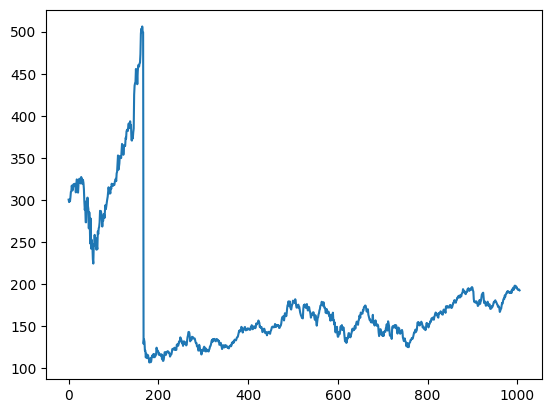

In [12]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [13]:
### LSTM are sensitive to the scale of the data . so we can apply MinMax scaler


In [14]:
import numpy as np

In [15]:
df2

,close
0,300.35
1,297.43
2,299.80
3,298.39
4,303.19
...,...
1001,193.60
1002,193.05
1003,193.15
1004,193.58


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [17]:
print(df2)

[[0.48468378]
 [0.47737007]
 [0.4833062 ]
 ...
 [0.21618034]
 [0.21725736]
 [0.21462743]]


In [18]:
### splitting dataset into train and test split
training_size=int(len(df2)*0.65)
test_size=(len(df2))-training_size
train_data,test_data=df2[0:training_size,:],df2[training_size:len(df2),:1]

In [19]:
training_size,test_size

(653, 353)

In [20]:
len(train_data),len(test_data)

(653, 353)

In [21]:
train_data

array([[4.84683782e-01],
       [4.77370069e-01],
       [4.83306199e-01],
       [4.79774577e-01],
       [4.91797120e-01],
       [5.07927364e-01],
       [5.09680651e-01],
       [5.26286788e-01],
       [5.15566688e-01],
       [5.12210394e-01],
       [5.21978710e-01],
       [5.30720100e-01],
       [5.25309956e-01],
       [5.28140263e-01],
       [5.31972448e-01],
       [5.29668128e-01],
       [5.06224170e-01],
       [5.28115216e-01],
       [5.44771446e-01],
       [5.43594239e-01],
       [5.07626800e-01],
       [5.05497808e-01],
       [5.31020664e-01],
       [5.37532874e-01],
       [5.46950532e-01],
       [5.33976205e-01],
       [5.37783344e-01],
       [5.32924233e-01],
       [5.51934878e-01],
       [5.46098936e-01],
       [5.46299311e-01],
       [5.31396368e-01],
       [5.42968065e-01],
       [5.34652473e-01],
       [5.16493425e-01],
       [4.79248591e-01],
       [4.53951158e-01],
       [4.65397621e-01],
       [4.17482780e-01],
       [4.17082029e-01],


In [22]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
                a = dataset[i:(i+time_step), 0] ###i=0 0,1,2,3

    ###a=0,1,2,3
                dataX.append(a)
                dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [23]:
# reshape into X=t, t+1, t+2, t+3 and y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [24]:
print(X_train)

[[0.48468378 0.47737007 0.4833062  ... 0.52601127 0.53112085 0.52571071]
 [0.47737007 0.4833062  0.47977458 ... 0.53112085 0.52571071 0.52916719]
 [0.4833062  0.47977458 0.49179712 ... 0.52571071 0.52916719 0.52951785]
 ...
 [0.12673763 0.14053851 0.12944271 ... 0.12510958 0.12651221 0.13943644]
 [0.14053851 0.12944271 0.11994991 ... 0.12651221 0.13943644 0.13693175]
 [0.12944271 0.11994991 0.1096556  ... 0.13943644 0.13693175 0.1331747 ]]


In [25]:
print(X_train.shape), print(y_train.shape)

(552, 100)
(552,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(252, 100)
(252,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
# create the Staked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
X_train[:100]

array([[[0.48468378],
        [0.47737007],
        [0.4833062 ],
        ...,
        [0.52601127],
        [0.53112085],
        [0.52571071]],

       [[0.47737007],
        [0.4833062 ],
        [0.47977458],
        ...,
        [0.53112085],
        [0.52571071],
        [0.52916719]],

       [[0.4833062 ],
        [0.47977458],
        [0.49179712],
        ...,
        [0.52571071],
        [0.52916719],
        [0.52951785]],

       ...,

       [[0.52601127],
        [0.53112085],
        [0.52571071],
        ...,
        [0.02036318],
        [0.02537257],
        [0.04398247]],

       [[0.53112085],
        [0.52571071],
        [0.52916719],
        ...,
        [0.02537257],
        [0.04398247],
        [0.03571697]],

       [[0.52571071],
        [0.52916719],
        [0.52951785],
        ...,
        [0.04398247],
        [0.03571697],
        [0.03594239]]])

In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - loss: 0.0500 - val_loss: 9.3701e-04
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0129 - val_loss: 0.0015
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - loss: 0.0113 - val_loss: 9.8693e-04
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0136 - val_loss: 7.5399e-04
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - loss: 0.0120 - val_loss: 0.0011
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - loss: 0.0109 - val_loss: 1.9447e-04
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - loss: 0.0071 - val_loss: 2.9827e-04
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - loss: 0.0061 - val_loss: 1.9118e-04
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 493ms/step - loss: 0.0071 - val_loss: 2.5310e-04
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 0.0067 - val_loss: 1.9140e-04
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 0.0053 - val_loss: 5.8116e-04
Epoch 12/100
9/9 ━━━━━━━━━━

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.19.0'

In [35]:
### lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [36]:
### Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

196.86316617336865

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

175.28423282004772

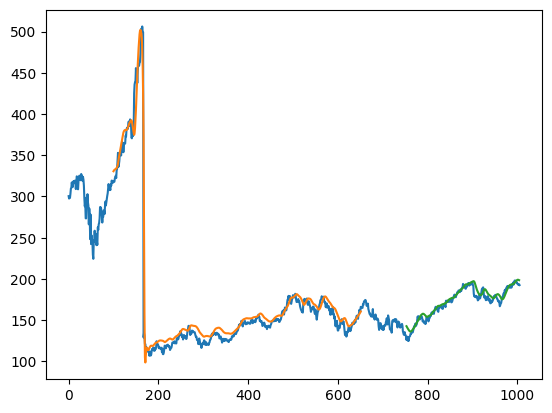

In [39]:
### Plotting
# shift train prediction for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [40]:
441-100

341

In [43]:
len(test_data)

353

In [41]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 12)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596]

In [49]:
 # demonstrate prediction for next 10 days
 from numpy import array

 first_output=[]
 n_steps=100
 i=0
while(i<30):

     if(len(temp_input)>100):
      #print(temp_input)
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input = x_input.reshape((1, n_steps, 1))
      #print(x_input)
      yhat = model.predict(x_input, verbose=0)
      print("{} day output {}".format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      #print(temp_input)
      first_output.extend(yhat.tolist())
      i=i+1
     else:
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      first_output.extend(yhat.tolist())
      i=i+1


 print(first_output)

0 day input [0.16804008 0.17019411 0.17342517 0.16310582 0.15927364 0.15992486
 0.1612273  0.16758923 0.16420789 0.16736381 0.17049468 0.17695679
 0.18071384 0.17921102 0.18274264 0.18502192 0.18036318 0.18003757
 0.1761052  0.17282405 0.17187226 0.16541014 0.16571071 0.16681277
 0.16095178 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026
 0.17715717 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799
 0.19927364 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409
 0.21192235 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242
 0.20671259 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144
 0.2189856  0.22259236 0.21625548 0.22008766 0.22822793 0.22860363
 0.2272511  0.22304321 0.22567314 0.22038823 0.22001252 0.21730745
 0.21592987 0.21618034 0.21725736 0.21462743 0.22772428 0.22728832
 0.22741839 0.22799747 0.22888285 0.22995871 0.23114574 0.23239487
 0.23367764 0.23497833 0.23628832 0.23760261 0.2389183  0.24023341
 0.24154666 0.24285716 0.24416462 0.24546893 0.2467

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt


In [52]:
len(df2)

1006

In [55]:
df3=df2.tolist()
df3.extend(first_output)


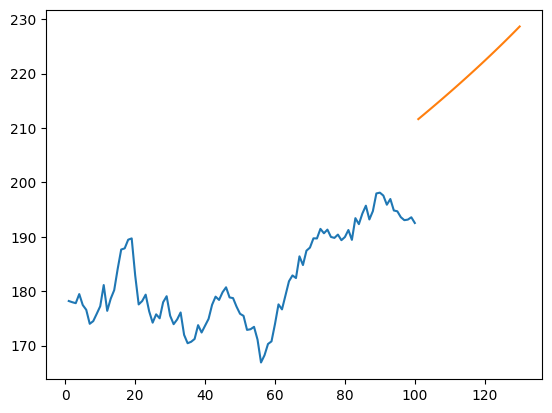

In [59]:
df3=df2.tolist()
df3.extend(first_output)
plt.plot(day_new,scaler.inverse_transform(df2[906:]))
plt.plot(day_pred,scaler.inverse_transform(first_output))


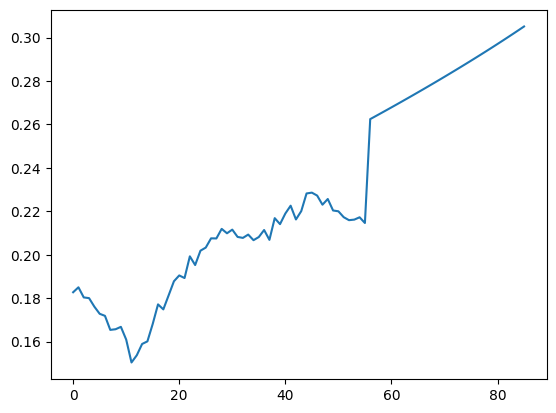

In [63]:
df3=df2.tolist()
df3.extend(first_output)
plt.plot(df3[950:])